In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
merged_df_filtered = pd.read_csv(r"C:\Users\liuc\Downloads\HealthAndQCEW_v3.csv")

In [3]:
merged_df_filtered.columns

Index(['Year', 'FIPS', 'State', 'County', '# Alcohol-Impaired Driving Deaths',
       '# Driving Deaths', '% Adults with Obesity', '% Children in Poverty',
       '% Children in Single-Parent Households', '% Drive Alone to Work',
       '% Excessive Drinking', '% Fair or Poor Health',
       '% Long Commute - Drives Alone', '% Low Birthweight',
       '% Severe Housing Problems', '% Smokers', '% Some College',
       '% Unemployed', '% Uninsured',
       '% With Access to Exercise Opportunities', 'Food Environment Index',
       'Income Ratio', 'Mentally Unhealthy Days', 'Physically Unhealthy Days',
       'Premature Deaths', 'Preventable Hospitalization Rate',
       'Primary Care Physicians Rate', 'Social Association Rate',
       'Teen Birth Rate', 'Violent Crime Rate', 'quarter',
       'Earnings_Beginning_Qtr', 'Employment_Count', 'New_Hires',
       'Earnings_Suppression_Flag', 'Employment_Suppression_Flag',
       'Hires_Suppression_Flag', 'industry', 'industry_name', 'Populatio

In [4]:
df = merged_df_filtered.copy()

# --- ID and categorical columns ---
df['FIPS'] = df['FIPS'].astype(str)
df['State'] = df['State'].astype(str)
df['County'] = df['County'].astype(str)
df['industry'] = df['industry'].astype(str)
df['industry_name'] = df['industry_name'].astype(str)

# --- Time columns ---
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df['quarter'] = pd.to_numeric(df['quarter'], errors='coerce').astype('Int64')

# --- Function to safely clean numeric columns ---
def clean_numeric(series):
    if series.dtype == object:
        series = series.astype(str).str.replace('%', '', regex=False).str.replace(',', '', regex=False)
    return pd.to_numeric(series, errors='coerce')

# --- Health and economic numeric columns ---
numeric_cols = [
    '# Alcohol-Impaired Driving Deaths', '# Driving Deaths',
    '% Adults with Obesity', '% Children in Poverty',
    '% Children in Single-Parent Households', '% Drive Alone to Work',
    '% Excessive Drinking', '% Fair or Poor Health',
    '% Long Commute - Drives Alone', '% Low Birthweight',
    '% Severe Housing Problems', '% Smokers', '% Some College',
    '% Unemployed', '% Uninsured', '% With Access to Exercise Opportunities',
    'Food Environment Index', 'Income Ratio', 'Mentally Unhealthy Days',
    'Physically Unhealthy Days', 'Premature Deaths',
    'Preventable Hospitalization Rate', 'Primary Care Physicians Rate',
    'Social Association Rate', 'Teen Birth Rate', 'Violent Crime Rate',
    'Employment_Count', 'Earnings_Beginning_Qtr', 'New_Hires','Population',
       'employment_per_1k', 'new_hires_per_1k', 'earnings_per_capita',
       'employment_rate_pct', 'new_hires_rate_pct', 'hire_rate',
       'employment_lag', 'employment_qoq_growth', 'new_hires_lag',
       'new_hires_qoq_growth', 'driving_deaths_per_100k',
       'alcohol_driving_deaths_per_100k', 'premature_deaths_per_100k'
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = clean_numeric(df[col])



In [5]:
# Drop obvious duplicates
df = df.drop_duplicates().drop(['Earnings_Suppression_Flag', 'Employment_Suppression_Flag', 'Hires_Suppression_Flag'], axis=1)

# Check missingness
missing_summary = df.isna().mean().sort_values(ascending=False)
display(missing_summary.head(20))

# Summary stats
df.describe().T


Primary Care Physicians Rate               0.386714
premature_deaths_per_100k                  0.230214
Premature Deaths                           0.230064
new_hires_qoq_growth                       0.225686
Violent Crime Rate                         0.217446
hire_rate                                  0.158622
new_hires_lag                              0.128340
employment_qoq_growth                      0.126226
employment_lag                             0.117994
new_hires_rate_pct                         0.107383
new_hires_per_1k                           0.107383
New_Hires                                  0.107252
Preventable Hospitalization Rate           0.105945
% With Access to Exercise Opportunities    0.098148
employment_per_1k                          0.096913
employment_rate_pct                        0.096913
Employment_Count                           0.096775
Income Ratio                               0.092978
Social Association Rate                    0.092040
% Drive Alon

,count,mean,std,min,25%,50%,75%,max
Year,2573811.0,2018.961237,3.152754,2014.0,2016.0,2019.0,2022.0,2024.0
# Alcohol-Impaired Driving Deaths,2561011.0,16.876102,37.131784,0.0,3.0,8.0,16.0,901.0
# Driving Deaths,2561011.0,59.005066,132.035787,1.0,14.0,28.0,56.0,3668.0
% Adults with Obesity,2573779.0,32.891628,5.250595,10.7,29.5,32.9,36.4,58.9
% Children in Poverty,2573721.0,21.658168,9.024895,2.4,14.9,20.5,27.2,88.7
% Children in Single-Parent Households,2573666.0,29.456183,10.83255,0.0,21.919431,28.613139,35.682271,100.0
% Drive Alone to Work,2343466.0,79.371146,6.834085,5.66839,76.844142,80.574029,83.553669,99.333333
% Excessive Drinking,2442861.0,17.54483,3.685066,3.2,15.1,17.504962,19.822758,56.2
% Fair or Poor Health,2518559.0,17.795415,5.145897,4.4,13.90108,17.1,21.002861,50.8
% Long Commute - Drives Alone,2573731.0,31.344836,12.286219,0.0,21.9,30.7,39.8,84.5


In [6]:

corr = df[numeric_cols].corr()

# Focus on economic outcomes
econ_vars = ['Employment_Count', 'Earnings_Beginning_Qtr', 'New_Hires','employment_per_1k','new_hires_per_1k','earnings_per_capita']
health_vars = [col for col in numeric_cols if col not in econ_vars + ['Year', 'FIPS', 'quarter']]

# Correlation between health and economic metrics
corr_subset = corr.loc[health_vars, econ_vars].sort_values(by='Employment_Count', ascending=False)
corr_subset.style.background_gradient(cmap='coolwarm')


,Employment_Count,Earnings_Beginning_Qtr,New_Hires,employment_per_1k,new_hires_per_1k,earnings_per_capita
employment_lag,0.999778,0.041540,0.973288,0.318593,0.265210,-0.026795
new_hires_lag,0.976042,0.027176,0.986710,0.317006,0.283963,-0.024495
Population,0.396587,0.094151,0.389296,0.028782,0.019998,-0.038802
Premature Deaths,0.383994,0.100664,0.377209,0.034783,0.027072,-0.168911
# Driving Deaths,0.360393,0.085150,0.362928,0.021529,0.020018,-0.045760
# Alcohol-Impaired Driving Deaths,0.348663,0.080754,0.353476,0.020857,0.019786,-0.046861
employment_rate_pct,0.319152,0.008012,0.316259,1.000000,0.870569,0.183839
new_hires_rate_pct,0.265635,-0.029000,0.293309,0.870569,1.000000,0.143425
% Severe Housing Problems,0.126859,0.038749,0.128349,-0.002950,0.017196,-0.066453
% With Access to Exercise Opportunities,0.126055,0.088036,0.124740,0.054863,0.047935,-0.077763


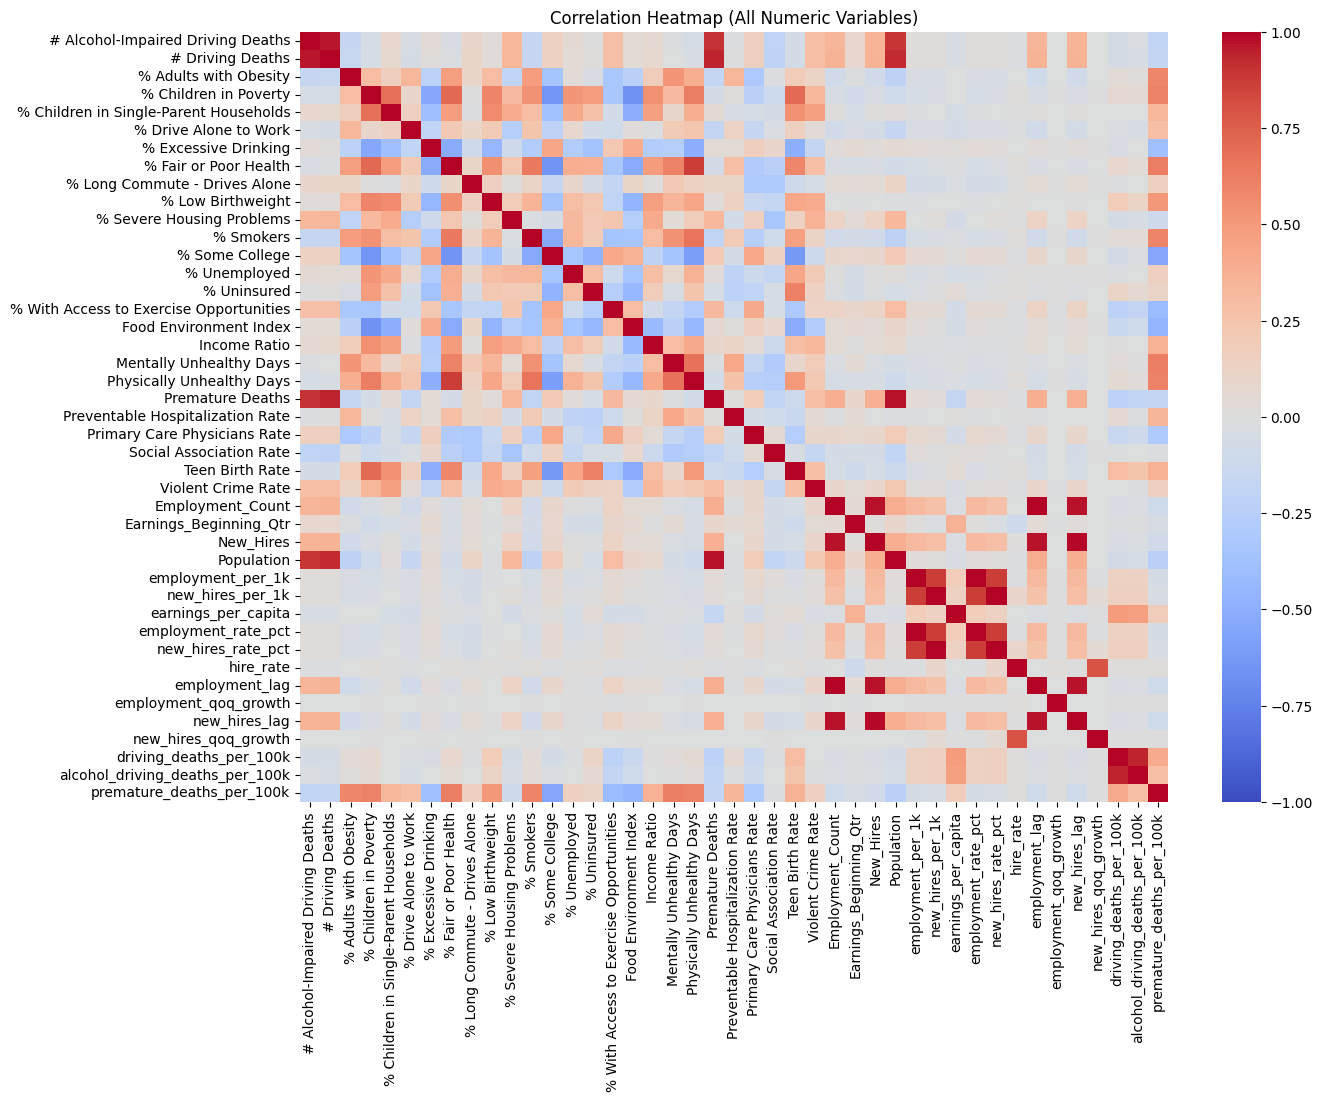

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap (All Numeric Variables)')
plt.show()


In [ ]:
# =========================
# Interactive State Trend Plot (2014–2024), now incl. engineered features
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets

# --------------------------------------
# 0) Assumptions: `df` is your cleaned dataframe (with engineered cols already added)
#    If your DataFrame is named `merged_full`, set:
try:
    df  # noqa
except NameError:
    df = merged_full.copy()

# Keep only years 2014–2024 (inclusive)
df = df.copy()
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df[(df['Year'] >= 2014) & (df['Year'] <= 2024)]

# --------------------------------------
# 1) Columns (base lists + engineered)
# --------------------------------------
health_cols = [
    '# Alcohol-Impaired Driving Deaths',
    '# Driving Deaths',
    '% Adults with Obesity',
    '% Children in Poverty',
    '% Children in Single-Parent Households',
    '% Drive Alone to Work',
    '% Excessive Drinking',
    '% Fair or Poor Health',
    '% Long Commute - Drives Alone',
    '% Low Birthweight',
    '% Severe Housing Problems',
    '% Smokers',
    '% Some College',
    '% Unemployed',
    '% Uninsured',
    '% With Access to Exercise Opportunities',
    'Food Environment Index',
    'Income Ratio',
    'Mentally Unhealthy Days',
    'Physically Unhealthy Days',
    'Premature Deaths',
    'Preventable Hospitalization Rate',
    'Primary Care Physicians Rate',
    'Social Association Rate',
    'Teen Birth Rate',
    'Violent Crime Rate'
]
econ_count_cols = ['Employment_Count', 'New_Hires']
econ_other_cols = ['Earnings_Beginning_Qtr']

# Engineered columns you asked to include
engineered_cols = [
    'employment_per_1k', 'new_hires_per_1k', 'earnings_per_capita',
    'employment_rate_pct', 'new_hires_rate_pct', 'hire_rate',
    'employment_lag', 'employment_qoq_growth', 'new_hires_lag',
    'new_hires_qoq_growth', 'driving_deaths_per_100k',
    'alcohol_driving_deaths_per_100k', 'premature_deaths_per_100k'
]

# Keep only columns that actually exist
health_cols      = [c for c in health_cols if c in df.columns]
econ_count_cols  = [c for c in econ_count_cols if c in df.columns]
econ_other_cols  = [c for c in econ_other_cols if c in df.columns]
engineered_cols  = [c for c in engineered_cols if c in df.columns]

all_vars = health_cols + econ_count_cols + econ_other_cols + engineered_cols

# --------------------------------------
# 2) Build State-Year aggregated table
#    - Counts: sum across rows (typ. counties/quarters)
#    - Rates/percaps/lags/growth: mean (simple avg across counties/quarters)
#    - Earnings_Beginning_Qtr as mean (if desired)
# --------------------------------------
agg_dict = {}

# Health raw counts/rates supplied by CHR (usually county-level): use mean
for col in health_cols:
    agg_dict[col] = 'mean'

# Counts sum
for col in econ_count_cols:
    agg_dict[col] = 'sum'

# Non-count economic (e.g., earnings level) -> mean
for col in econ_other_cols:
    agg_dict[col] = 'mean'

# Engineered metrics:
# - If it looks like a count (none of your engineered cols are counts), keep mean by default
# - This includes per-capita, percentages, rates, lags, growth, and per-100k measures
for col in engineered_cols:
    agg_dict[col] = 'mean'

# Group to State-Year
# If your df still has multiple quarters/industries, this will aggregate them.
state_year = (
    df.groupby(['State', 'Year'], as_index=False)
      .agg(agg_dict)
      .sort_values(['State', 'Year'])
)

# Ensure we have a complete 2014–2024 index per state (helpful for missing years)
def _complete_years(g):
    all_years = pd.DataFrame({'Year': np.arange(2014, 2025)})
    g = all_years.merge(g, on='Year', how='left')
    g['State'] = g['State'].ffill().bfill()
    return g

state_year = (
    state_year.groupby('State', as_index=False, group_keys=False)
              .apply(_complete_years)
)

# --------------------------------------
# 3) Widgets
# --------------------------------------
state_options = sorted(state_year['State'].dropna().unique().tolist())
var_options = all_vars

state_dd = widgets.Dropdown(
    options=state_options,
    value=state_options[0] if state_options else None,
    description='State:',
    layout=widgets.Layout(width='280px')
)
var1_dd = widgets.Dropdown(
    options=var_options,
    value=var_options[0] if var_options else None,
    description='Variable 1:',
    layout=widgets.Layout(width='380px')
)
var2_dd = widgets.Dropdown(
    options=var_options,
    value=var_options[1] if len(var_options) > 1 else (var_options[0] if var_options else None),
    description='Variable 2:',
    layout=widgets.Layout(width='380px')
)
normalize_cb = widgets.Checkbox(
    value=False,
    description='Normalize to 0–1 (per variable)',
    indent=False
)

# --------------------------------------
# 4) Plotting function
# --------------------------------------
def plot_state_trends(state, var1, var2, normalize):
    if state is None or var1 is None or var2 is None:
        print("Please ensure State, Variable 1, and Variable 2 are selected.")
        return
    if var1 == var2:
        print("Please choose two different variables.")
        return

    sub = state_year[state_year['State'] == state].copy()

    # Extract series
    y1 = sub[var1].astype(float)
    y2 = sub[var2].astype(float)
    x = sub['Year']

    # Optional normalization
    def _minmax(s):
        mn, mx = s.min(), s.max()
        if pd.isna(mn) or pd.isna(mx) or mx == mn:
            return s
        return (s - mn) / (mx - mn)

    if normalize:
        y1p = _minmax(y1)
        y2p = _minmax(y2)
        y1_label = f"{var1} (0–1)"
        y2_label = f"{var2} (0–1)"
    else:
        y1p, y2p = y1, y2
        y1_label, y2_label = var1, var2

    # Plot
    fig, ax1 = plt.subplots(figsize=(10, 5))

    color1 = "#1f77b4"  # blue
    color2 = "#ff7f0e"  # orange

    line1 = ax1.plot(x, y1p, marker='o', color=color1, label=y1_label)
    ax1.set_xlabel("Year")
    ax1.set_ylabel(y1_label, color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx()
    line2 = ax2.plot(x, y2p, marker='s', color=color2, label=y2_label)
    ax2.set_ylabel(y2_label, color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    title_norm = " (Normalized)" if normalize else ""
    plt.title(f"{state}: {var1} vs {var2} Trends, 2014–2024{title_norm}")

    ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
    ax1.set_xticks(np.arange(2014, 2025, 1))

    # Combined legend
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')

    fig.tight_layout()
    plt.show()

# --------------------------------------
# 5) Bind widgets
# --------------------------------------
ui = widgets.HBox([state_dd, var1_dd, var2_dd, normalize_cb])
out = widgets.interactive_output(
    plot_state_trends,
    {'state': state_dd, 'var1': var1_dd, 'var2': var2_dd, 'normalize': normalize_cb}
)

display(ui, out)


C:\Users\liuc\AppData\Local\Temp\ipykernel_27908\1446463109.py:116: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Output()

In [9]:
# ===============================
# County-level interactive trends (single-plot fix)
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive_output
from IPython.display import display

# 0) Data (assumes engineered cols already in df / merged_full)
try:
    df  # noqa
except NameError:
    try:
        df = merged_full.copy()
    except NameError:
        df = merged_df_filtered.copy()

df['State']  = df['State'].astype(str)
df['County'] = df['County'].astype(str)
df['Year']   = pd.to_numeric(df['Year'], errors='coerce')
df = df[(df['Year'] >= 2014) & (df['Year'] <= 2024)].copy()

# 1) Variable lists
health_cols = [
    '# Alcohol-Impaired Driving Deaths', '# Driving Deaths',
    '% Adults with Obesity', '% Children in Poverty',
    '% Children in Single-Parent Households', '% Drive Alone to Work',
    '% Excessive Drinking', '% Fair or Poor Health',
    '% Long Commute - Drives Alone', '% Low Birthweight',
    '% Severe Housing Problems', '% Smokers', '% Some College',
    '% Unemployed', '% Uninsured',
    '% With Access to Exercise Opportunities',
    'Food Environment Index', 'Income Ratio',
    'Mentally Unhealthy Days', 'Physically Unhealthy Days',
    'Premature Deaths', 'Preventable Hospitalization Rate',
    'Primary Care Physicians Rate', 'Social Association Rate',
    'Teen Birth Rate', 'Violent Crime Rate'
]
econ_count_cols = ['Employment_Count', 'New_Hires']
econ_other_cols = ['Earnings_Beginning_Qtr']
engineered_cols = [
    'employment_per_1k', 'new_hires_per_1k', 'earnings_per_capita',
    'employment_rate_pct', 'new_hires_rate_pct', 'hire_rate',
    'employment_lag', 'employment_qoq_growth', 'new_hires_lag',
    'new_hires_qoq_growth', 'driving_deaths_per_100k',
    'alcohol_driving_deaths_per_100k', 'premature_deaths_per_100k'
]

health_cols      = [c for c in health_cols if c in df.columns]
econ_count_cols  = [c for c in econ_count_cols if c in df.columns]
econ_other_cols  = [c for c in econ_other_cols if c in df.columns]
engineered_cols  = [c for c in engineered_cols if c in df.columns]
all_vars = health_cols + econ_count_cols + econ_other_cols + engineered_cols

# 2) County-Year aggregation (counts sum; everything else mean)
agg_dict = {c: 'mean' for c in health_cols}
for c in econ_count_cols: agg_dict[c] = 'sum'
for c in econ_other_cols: agg_dict[c] = 'mean'
for c in engineered_cols: agg_dict[c] = 'mean'

county_year = (
    df.groupby(['State','County','Year'], as_index=False)
      .agg(agg_dict)
      .sort_values(['State','County','Year'])
)

def _complete_years(g):
    all_years = pd.DataFrame({'Year': np.arange(2014, 2025)})
    g = all_years.merge(g, on='Year', how='left')
    g['State']  = g['State'].ffill().bfill()
    g['County'] = g['County'].ffill().bfill()
    return g

county_year = (
    county_year.groupby(['State','County'], as_index=False, group_keys=False)
               .apply(_complete_years)
)

# 3) Widgets
state_options = sorted(county_year['State'].dropna().unique().tolist())

state_dd = widgets.Dropdown(
    options=state_options,
    value=state_options[0] if state_options else None,
    description='State:',
    layout=widgets.Layout(width='280px')
)

def _counties_for(st):
    if st is None: return []
    return sorted(county_year.loc[county_year['State']==st, 'County'].dropna().unique().tolist())

county_dd = widgets.Dropdown(
    options=_counties_for(state_dd.value),
    value=_counties_for(state_dd.value)[0] if _counties_for(state_dd.value) else None,
    description='County:',
    layout=widgets.Layout(width='300px')
)

var1_dd = widgets.Dropdown(
    options=all_vars, value=(all_vars[0] if all_vars else None),
    description='Variable 1:', layout=widgets.Layout(width='380px')
)
var2_dd = widgets.Dropdown(
    options=all_vars,
    value=(all_vars[1] if len(all_vars)>1 else (all_vars[0] if all_vars else None)),
    description='Variable 2:', layout=widgets.Layout(width='380px')
)
normalize_cb = widgets.Checkbox(
    value=False, description='Normalize to 0–1 (per variable)', indent=False
)

# Avoid double-callbacks when state changes county options
def _on_state_change(change):
    if change['name'] != 'value': return
    # Temporarily unobserve county to avoid two renders
    try:
        county_dd.unobserve(_on_county_change, names='value')
    except Exception:
        pass
    new_opts = _counties_for(change['new'])
    county_dd.options = new_opts
    county_dd.value   = (new_opts[0] if new_opts else None)
    # Re-observe
    county_dd.observe(_on_county_change, names='value')

def _on_county_change(change):
    # no body needed; interactive_output will handle updates
    return

state_dd.observe(_on_state_change, names='value')
county_dd.observe(_on_county_change, names='value')

# 4) Render function (no display() calls; just plot)
def render(state, county, var1, var2, normalize):
    if not all([state, county, var1, var2]): 
        return
    if var1 == var2:
        return

    sub = county_year[(county_year['State']==state) & (county_year['County']==county)].copy()
    x  = sub['Year'].astype(int)
    y1 = pd.to_numeric(sub[var1], errors='coerce')
    y2 = pd.to_numeric(sub[var2], errors='coerce')

    def _minmax(s):
        mn, mx = s.min(), s.max()
        if pd.isna(mn) or pd.isna(mx) or mx == mn: return s
        return (s - mn) / (mx - mn)

    if normalize:
        y1p, y2p = _minmax(y1), _minmax(y2)
        y1_label, y2_label = f"{var1} (0–1)", f"{var2} (0–1)"
    else:
        y1p, y2p = y1, y2
        y1_label, y2_label = var1, var2

    fig, ax1 = plt.subplots(figsize=(10,5))
    color1, color2 = "#1f77b4", "#ff7f0e"

    line1 = ax1.plot(x, y1p, marker='o', color=color1, label=y1_label)
    ax1.set_xlabel("Year")
    ax1.set_ylabel(y1_label, color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx()
    line2 = ax2.plot(x, y2p, marker='s', color=color2, label=y2_label)
    ax2.set_ylabel(y2_label, color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    title_norm = " (Normalized)" if normalize else ""
    plt.title(f"{county}, {state}: {var1} vs {var2} Trends, 2014–2024{title_norm}")
    ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
    ax1.set_xticks(np.arange(2014, 2025, 1))

    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')

    fig.tight_layout()
    plt.show()

# 5) Wire up a single output (prevents multiple plots)
controls = widgets.HBox([state_dd, county_dd, var1_dd, var2_dd, normalize_cb])
out = interactive_output(
    render,
    {'state': state_dd, 'county': county_dd, 'var1': var1_dd, 'var2': var2_dd, 'normalize': normalize_cb}
)

display(controls, out)


C:\Users\liuc\AppData\Local\Temp\ipykernel_27908\3455130331.py:77: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(_complete_years)


Output()

In [10]:
# ============================================
# US State Choropleth (variable + year picker) — incl. engineered features
# ============================================
import pandas as pd
import numpy as np
import plotly.express as px
from ipywidgets import widgets, interactive_output
from IPython.display import display

# ---- 0) Use your cleaned dataframe (with engineered cols already added)
try:
    df  # noqa
except NameError:
    try:
        df = merged_full.copy()
    except NameError:
        df = merged_df_filtered.copy()

# ---- 1) Keep 2014–2024, ensure Year numeric
df = df.copy()
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df[(df['Year'] >= 2014) & (df['Year'] <= 2024)]

# ---- 2) Variable lists (base + engineered)
health_cols = [
    '# Alcohol-Impaired Driving Deaths', '# Driving Deaths',
    '% Adults with Obesity', '% Children in Poverty',
    '% Children in Single-Parent Households', '% Drive Alone to Work',
    '% Excessive Drinking', '% Fair or Poor Health',
    '% Long Commute - Drives Alone', '% Low Birthweight',
    '% Severe Housing Problems', '% Smokers', '% Some College',
    '% Unemployed', '% Uninsured', '% With Access to Exercise Opportunities',
    'Food Environment Index', 'Income Ratio', 'Mentally Unhealthy Days',
    'Physically Unhealthy Days', 'Premature Deaths',
    'Preventable Hospitalization Rate', 'Primary Care Physicians Rate',
    'Social Association Rate', 'Teen Birth Rate', 'Violent Crime Rate'
]
econ_count_cols = ['Employment_Count', 'New_Hires']
econ_other_cols = ['Earnings_Beginning_Qtr']

engineered_cols = [
    'employment_per_1k', 'new_hires_per_1k', 'earnings_per_capita',
    'employment_rate_pct', 'new_hires_rate_pct', 'hire_rate',
    'employment_lag', 'employment_qoq_growth', 'new_hires_lag',
    'new_hires_qoq_growth', 'driving_deaths_per_100k',
    'alcohol_driving_deaths_per_100k', 'premature_deaths_per_100k'
]

# Keep only columns that actually exist
health_cols      = [c for c in health_cols if c in df.columns]
econ_count_cols  = [c for c in econ_count_cols if c in df.columns]
econ_other_cols  = [c for c in econ_other_cols if c in df.columns]
engineered_cols  = [c for c in engineered_cols if c in df.columns]
all_vars = health_cols + econ_count_cols + econ_other_cols + engineered_cols
if not all_vars:
    raise ValueError("No variables found. Ensure engineered columns were created and base columns exist.")

# ---- 3) Aggregate to state-year
# Counts -> sum; everything else (rates/percaps/lags/growth/earnings/health %) -> mean
agg_dict = {}
for col in health_cols:          agg_dict[col] = 'mean'
for col in econ_count_cols:      agg_dict[col] = 'sum'
for col in econ_other_cols:      agg_dict[col] = 'mean'
for col in engineered_cols:      agg_dict[col] = 'mean'

state_year = (
    df.groupby(['State','Year'], as_index=False)
      .agg(agg_dict)
)

# ---- 4) Map state names -> USPS codes (for Plotly)
state_to_code = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO',
    'Connecticut':'CT','Delaware':'DE','District of Columbia':'DC','Florida':'FL','Georgia':'GA',
    'Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY',
    'Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN',
    'Mississippi':'MS','Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH',
    'New Jersey':'NJ','New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND',
    'Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI','South Carolina':'SC',
    'South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT','Virginia':'VA',
    'Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}
state_year['code'] = state_year['State'].map(state_to_code)

# ---- 5) Widgets
var_dd  = widgets.Dropdown(
    options=all_vars,
    value=all_vars[0] if all_vars else None,
    description='Variable:',
    layout=widgets.Layout(width='420px')
)
yrs = sorted(state_year['Year'].dropna().unique().tolist())
year_dd = widgets.Dropdown(
    options=yrs,
    value=yrs[-1] if yrs else None,
    description='Year:',
    layout=widgets.Layout(width='200px')
)

# ---- 6) Custom yellow colorscale (light → dark)
ylw_scale = [
    (0.00, "#fffde7"),
    (0.33, "#fff59d"),
    (0.66, "#fdd835"),
    (1.00, "#f9a825")
]

# ---- 7) Plot function (single render via interactive_output)
def show_map(variable, year):
    if variable is None or year is None:
        return
    dat = state_year[state_year['Year'] == year].copy()
    # Guard against all-NaN column
    if variable not in dat.columns or dat[variable].notna().sum() == 0:
        fig = px.choropleth()
        fig.update_layout(title=f"No data for {variable} in {int(year)}")
        fig.show()
        return

    fig = px.choropleth(
        dat,
        locations='code',
        locationmode='USA-states',
        color=variable,
        scope='usa',
        color_continuous_scale=ylw_scale,
        hover_name='State',
        hover_data={'code': False, 'Year': True, variable: ':.2f'},
        labels={variable: variable.replace('_',' ')}
    )

    fig.update_layout(
        title=f"US States — {variable} ({int(year)})",
        title_x=0.5,
        coloraxis_colorbar=dict(title=variable),
        geo=dict(bgcolor='rgba(0,0,0,0)'),
        width=1050,     # ✅ custom width
        height=600,     # ✅ custom height
        margin=dict(l=0, r=0, t=60, b=0)
    )

    fig.update_traces(marker_line_color="white", marker_line_width=0.5)
    fig.show()

# ---- 8) Wire up UI (single output)
ui = widgets.HBox([var_dd, year_dd])
out = interactive_output(show_map, {'variable': var_dd, 'year': year_dd})
display(ui, out)


Output()

In [11]:
# ============================================================
# State selector → LASSO drivers of employment_per_1k
#  - Keeps your original choropleth untouched
#  - No FigureWidget / anywidget dependency
#  - Robust to NaNs, constant columns, and small samples
# ============================================================
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets, HBox, VBox
from IPython.display import display
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ---------------------------
# 0) Source data assumptions
#    df (or merged_full / merged_df_filtered) already includes engineered columns:
#    employment_per_1k, new_hires_per_1k, driving_deaths_per_100k, etc.
# ---------------------------
try:
    df  # noqa
except NameError:
    try:
        df = merged_full.copy()
    except NameError:
        df = merged_df_filtered.copy()

df = df.copy()
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df[(df['Year'] >= 2014) & (df['Year'] <= 2024)]
df['State']  = df['State'].astype(str)
df['County'] = df['County'].astype(str)

# ---------------------------
# 1) Target + exclusions (avoid leakage)
# ---------------------------
target = "employment_per_1k"

employment_related = [
    'Employment_Count','employment_per_1k','employment_rate_pct',
    'employment_lag','employment_qoq_growth','Earnings_Beginning_Qtr',
    'New_Hires','new_hires_per_1k','new_hires_rate_pct',
    'new_hires_lag','new_hires_qoq_growth','hire_rate'
]
key_cols = ['State','County','FIPS','Year','quarter','industry','industry_name','code']
exclude_cols = set(employment_related + key_cols + [target])

# ---------------------------
# 2) Aggregates for the map (state-year mean of target)
# ---------------------------
state_year = df.groupby(['State','Year'], as_index=False)[target].mean()

state_to_code = {
 'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO',
 'Connecticut':'CT','Delaware':'DE','District of Columbia':'DC','Florida':'FL','Georgia':'GA',
 'Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY',
 'Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN',
 'Mississippi':'MS','Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH',
 'New Jersey':'NJ','New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND',
 'Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI','South Carolina':'SC',
 'South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT','Virginia':'VA',
 'Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}
state_year['code'] = state_year['State'].map(state_to_code)

ylw_scale = [(0.00,"#fffde7"), (0.33,"#fff59d"), (0.66,"#fdd835"), (1.00,"#f9a825")]

# ---------------------------
# 3) Widgets + outputs
# ---------------------------
years  = sorted(state_year['Year'].dropna().unique().tolist())
states = sorted(df['State'].dropna().unique().tolist())

state_dd = widgets.Dropdown(options=states, value=states[0] if states else None, description="State:", layout=widgets.Layout(width='260px'))
year_dd  = widgets.Dropdown(options=years,  value=years[-1] if years else None, description="Year:",  layout=widgets.Layout(width='160px'))
k_dd     = widgets.IntSlider(value=10, min=3, max=20, step=1, description="Top K:", continuous_update=False, layout=widgets.Layout(width='300px'))

out_map = widgets.Output()
out_bar = widgets.Output()

# ---------------------------
# 4) Helpers (panel + modeling)
# ---------------------------
def make_panel(df_state: pd.DataFrame) -> pd.DataFrame:
    """County-year numeric means; keeps it simple & robust."""
    return df_state.groupby(["County","Year"], as_index=False).mean(numeric_only=True)

def get_importance(state_name: str, k: int) -> pd.DataFrame:
    """Train LASSO-CV per state to predict employment_per_1k and return top-k |coef|."""
    sdf = df[df['State'] == state_name].copy()
    if sdf.empty:
        return pd.DataFrame()

    panel = make_panel(sdf)

    # Ensure target exists and is clean
    if target not in panel.columns:
        return pd.DataFrame()
    panel[target] = pd.to_numeric(panel[target], errors="coerce")
    ymask = panel[target].notna() & np.isfinite(panel[target])
    panel = panel.loc[ymask].copy()
    if panel.empty or panel[target].nunique() <= 1:
        return pd.DataFrame()

    # Build X
    X = panel.drop(columns=[c for c in exclude_cols if c in panel.columns], errors="ignore")
    X = X.select_dtypes(include=[np.number]).copy()

    # Prune bad columns
    non_missing_frac = X.notna().mean()
    X = X.loc[:, non_missing_frac > 0.30]   # keep cols with >30% non-missing
    nunique = X.nunique(dropna=True)
    X = X.loc[:, nunique > 1]               # drop constants

    if X.empty:
        return pd.DataFrame()

    # Impute
    X = X.fillna(X.median(numeric_only=True))
    y = panel[target].reindex(X.index)

    # Require minimum sample size for stability
    if len(X) < max(25, 2*k):
        return pd.DataFrame()

    # LASSO with scaling + CV
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso",  LassoCV(cv=5, random_state=42, n_alphas=100))
    ])

    try:
        pipe.fit(X, y)
    except Exception:
        return pd.DataFrame()

    coefs = pipe.named_steps["lasso"].coef_
    out = (pd.DataFrame({"feature": X.columns, "coef": coefs})
           .assign(importance=lambda d: d["coef"].abs())
           .sort_values("importance", ascending=False)
           .head(k))
    return out

# ---------------------------
# 5) Update routine
# ---------------------------
def update(_=None):
    year = year_dd.value
    st   = state_dd.value
    k    = int(k_dd.value)

    # Map
    with out_map:
        out_map.clear_output()
        dat = state_year[state_year["Year"] == year].copy()
        fig = px.choropleth(
            dat,
            locations="code", locationmode="USA-states",
            color=target, scope="usa",
            color_continuous_scale=ylw_scale,
            hover_name="State",
            hover_data={"code": False, "Year": True, target: ':.2f'},
            labels={target: target.replace('_',' ')}
        )
        fig.update_layout(
            title=f"Employment per 1k — state mean ({int(year)})",
            title_x=0.5,
            width=820, height=500,
            margin=dict(l=0, r=0, t=50, b=0),
            coloraxis_colorbar=dict(title=target.replace('_',' '))
        )
        fig.update_traces(marker_line_color="white", marker_line_width=0.5)
        fig.show()

    # Drivers
    with out_bar:
        out_bar.clear_output()
        imp = get_importance(st, k)
        if imp.empty:
            print(f"Model couldn’t run for {st}: not enough clean data or no variation in target.")
            return

        imp = imp.sort_values("importance")  # small→large so bars read top-down
        fig2 = go.Figure(go.Bar(
            x=imp["importance"],
            y=imp["feature"],
            orientation="h",
            text=[f"{v:+.3f}" for v in imp["coef"]],
            hovertemplate="%{y}<br>|coef|=%{x:.3f}<br>coef=%{text}<extra></extra>"
        ))
        fig2.update_layout(
            title=f"Top {k} drivers of employment_per_1k — {st}",
            xaxis_title="|LASSO coefficient| (standardized)",
            yaxis_title="",
            width=650, height=500,
            margin=dict(l=60, r=20, t=50, b=40)
        )
        fig2.show()

# Wire up events
state_dd.observe(update, names="value")
year_dd.observe(update,  names="value")
k_dd.observe(update,     names="value")

# Initial render
update()

# Display UI + outputs
controls = HBox([state_dd, year_dd, k_dd])
display(controls, HBox([out_map, out_bar]))
